In [1]:
%%capture
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

In [2]:
import os
os.makedirs('/content/raw', exist_ok = True)
if not os.path.exists('/content/Project_data'):
    !wget -qq 'https://drive.usercontent.google.com/download?id=1ehyrYBQ5rbQQe6yL4XbLWe3FMvuVUGiL&authuser=0&confirm=t&uuid=faf8eb67-a465-4b76-80b1-5b88a80636ac&at=APZUnTXrM6uktCZvJt_HJpJYg4M0%3A1705871212413' -O /content/raw/data.zip
    !unzip -qq /content/raw/data.zip

In [3]:
os.chdir('/content/drive/MyDrive/Gesture Recognition TF/src')

## Helper

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('icefire')

import numpy as np
from configs.config import Config
from models.cnn_lstm import convlstm
from train.main import Trainer

def plot_performance(path):
    log_df = pd.read_csv(os.path.join(path, 'training.log'), sep = ',')
    fig, axes = plt.subplots(1, 2, figsize = (12, 4))
    sns.lineplot(data = log_df, x = 'epoch', y = 'loss', ax = axes[0], label = 'train_loss')
    sns.lineplot(data = log_df, x = 'epoch', y = 'val_loss', ax = axes[0], label = 'val_loss')
    axes[0].set(xlabel = 'epoch', ylabel = 'loss', title = 'Loss profile')
    sns.lineplot(data = log_df, x = 'epoch', y = 'categorical_accuracy', ax = axes[1], label = 'train_accuracy')
    sns.lineplot(data = log_df, x = 'epoch', y = 'val_categorical_accuracy', ax = axes[1], label = 'val_accuracy')
    axes[1].set(xlabel = 'epoch', ylabel = 'accuracy', title = 'accuracy profile')
    plt.tight_layout()
    plt.show()

## (Baseline) Experiment 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 5, 118, 118, 8)    224       
 ributed)                                                        
                                                                 
 batch_normalization (Batch  (None, 5, 118, 118, 8)    32        
 Normalization)                                                  
                                                                 
 time_distributed_1 (TimeDi  (None, 5, 116, 116, 16)   1168      
 stributed)                                                      
                                                                 
 batch_normalization_1 (Bat  (None, 5, 116, 116, 16)   64        
 chNormalization)                                                
                                                                 
 conv_lstm2d (ConvLSTM2D)    (None, 114, 114, 8)       6

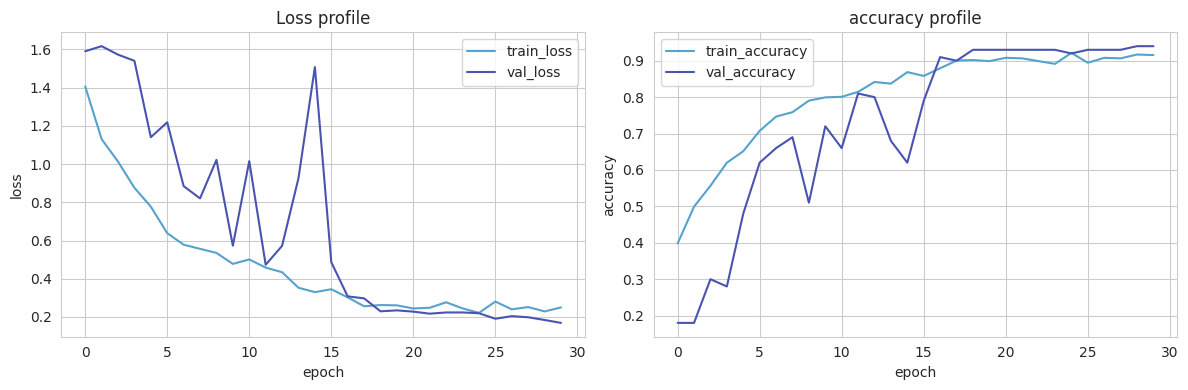

In [ ]:
config = Config()
config.data_dir = '../data'
config.models_dir = '../models'
config.model_name = 'conv_lstm-exp1'
config.colab_clips_dir = '/content/Project_data'
config.aug_size = 0
config.clip_dim = (30, 3, 120, 120)
config.train_batch_size = 10
config.valid_batch_size = 64
config.num_epochs = 30
config.frame_idx = list(range(30))

config.save_checkpoint = True

model = convlstm(conv_config =[(8, 3, 0), (16, 3, 0)],
                 conv_lstm_config = [(8, 3, 0)],
                 dense_config=[(64, 0)],
                 clip_dim = config.clip_dim)
print(model.summary())
print("Total Params:", f'{round(model.count_params()/1e6,2)}M'); print('-'*120)
history, meta_data = Trainer(config = config).start(model = model)
plot_performance(path = config.dest_path)

**Observations:**
- Validation accuracy (0.9400) surpassed train accuracy (0.9155) marginally
- Achieved the result with only 13,781 parameters
- Trained will all 30 frames. In the next series of experiments, the frames are reduced, by taking from the middle of the video clip, to investigate performance.


## Experiment 2
- Use same model architecture as baseline (experiment 1)
- Reduce video frames to 20. The frames will be gathered in the middle from index 5 to 24.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_3 (TimeDi  (None, 5, 118, 118, 8)    224       
 stributed)                                                      
                                                                 
 batch_normalization_4 (Bat  (None, 5, 118, 118, 8)    32        
 chNormalization)                                                
                                                                 
 time_distributed_4 (TimeDi  (None, 5, 116, 116, 16)   1168      
 stributed)                                                      
                                                                 
 batch_normalization_5 (Bat  (None, 5, 116, 116, 16)   64        
 chNormalization)                                                
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 114, 114, 8)      

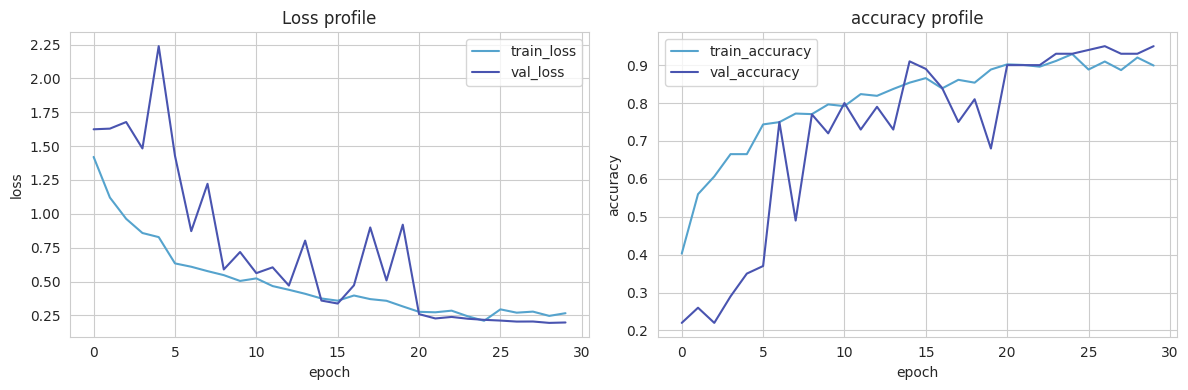

In [ ]:
config = Config()
config.data_dir = '../data'
config.models_dir = '../models'
config.model_name = 'conv_lstm-exp2'
config.colab_clips_dir = '/content/Project_data'
config.aug_size = 0
config.clip_dim = (20, 3, 120, 120)
config.train_batch_size = 10
config.valid_batch_size = 64
config.num_epochs = 30
config.frame_idx = list(range(5, 25))

config.save_checkpoint = True

model = convlstm(conv_config =[(8, 3, 0), (16, 3, 0)],
                 conv_lstm_config = [(8, 3, 0)],
                 dense_config=[(64, 0.25)],
                 clip_dim = config.clip_dim)
print(model.summary())
print("Total Params:", f'{round(model.count_params()/1e6,2)}M'); print('-'*120)
history, meta_data = Trainer(config = config).start(model = model)
plot_performance(path = config.dest_path)

**Observations:**
- Validation accuracy of the model trained with with 20 frames from the middle of the video clip is better than using all the 30 frames. The difference in accuracy is only 0.01 (0.95 vs. 0.94).
- In the next experiment, the frames are reduce to 15.


## Experiment 3
- Use same model architecture as baseline (experiment 1)
- Reduce video frames to 15. The frames will be gathered in the middle from index 7 to 21.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDi  (None, 5, 118, 118, 8)    224       
 stributed)                                                      
                                                                 
 batch_normalization_8 (Bat  (None, 5, 118, 118, 8)    32        
 chNormalization)                                                
                                                                 
 time_distributed_7 (TimeDi  (None, 5, 116, 116, 16)   1168      
 stributed)                                                      
                                                                 
 batch_normalization_9 (Bat  (None, 5, 116, 116, 16)   64        
 chNormalization)                                                
                                                                 
 conv_lstm2d_2 (ConvLSTM2D)  (None, 114, 114, 8)      

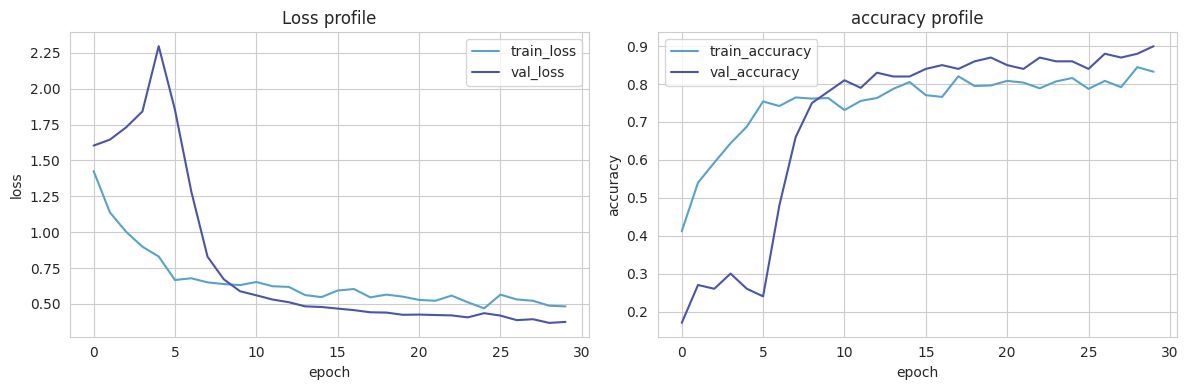

In [ ]:
config = Config()
config.data_dir = '../data'
config.models_dir = '../models'
config.model_name = 'conv_lstm-exp3'
config.colab_clips_dir = '/content/Project_data'
config.aug_size = 0
config.clip_dim = (15, 3, 120, 120)
config.train_batch_size = 10
config.valid_batch_size = 64
config.num_epochs = 30
config.frame_idx = list(range(7, 22))

config.save_checkpoint = True

model = convlstm(conv_config =[(8, 3, 0), (16, 3, 0)],
                 conv_lstm_config = [(8, 3, 0)],
                 dense_config=[(64, 0.25)],
                 clip_dim = config.clip_dim)
print(model.summary())
print("Total Params:", f'{round(model.count_params()/1e6,2)}M'); print('-'*120)
history, meta_data = Trainer(config = config).start(model = model)
plot_performance(path = config.dest_path)

**Observations**:
- Train and validation accuracy are 0.8446 and 0.9 respectively. The gap is more than previous two experiments.
- The accuracies are increasing and had we ran beyond 30 epochs the values would have be closer to previous best.
- In the next experiement, the frames are increased to 17 and introduced augmentation on 25% of training clips. The train dataset will aggregate to 1.25x of the original.

## Experiment 4
- Changes
  - Increase the frames from 15 to 17
  - Augmenting 25% of clips

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_9 (TimeDi  (None, 5, 118, 118, 8)    224       
 stributed)                                                      
                                                                 
 batch_normalization_12 (Ba  (None, 5, 118, 118, 8)    32        
 tchNormalization)                                               
                                                                 
 time_distributed_10 (TimeD  (None, 5, 116, 116, 16)   1168      
 istributed)                                                     
                                                                 
 batch_normalization_13 (Ba  (None, 5, 116, 116, 16)   64        
 tchNormalization)                                               
                                                                 
 conv_lstm2d_3 (ConvLSTM2D)  (None, 114, 114, 8)      

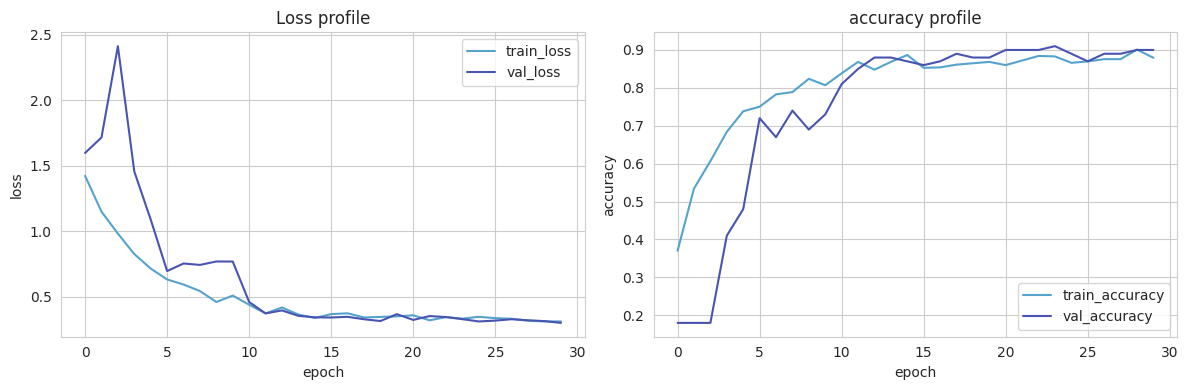

In [ ]:
config = Config()
config.data_dir = '../data'
config.models_dir = '../models'
config.model_name = 'conv_lstm-exp4'
config.colab_clips_dir = '/content/Project_data'
config.aug_size = 0.25
config.clip_dim = (17, 3, 120, 120)
config.train_batch_size = 10
config.valid_batch_size = 64
config.num_epochs = 30
config.frame_idx = list(range(7, 24))

config.save_checkpoint = True

model = convlstm(conv_config =[(8, 3, 0), (16, 3, 0)],
                 conv_lstm_config = [(8, 3, 0)],
                 dense_config=[(64, 0.25)],
                 clip_dim = config.clip_dim)
print(model.summary())
print("Total Params:", f'{round(model.count_params()/1e6,2)}M'); print('-'*120)
history, meta_data = Trainer(config = config).start(model = model)
plot_performance(path = config.dest_path)

**Observations:** The performance difference is marginal (by +0.01) in comparision with 15-frames experiment 2.

## Experiment 4
- Objective to maximize the performanance with 20 frames from 6 to 25.
Changes:
1. Increase augmentation to 50% of train clips
2. Increase frame image size from 120x120x3 to 160x160x3

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 5, 158, 158, 8)    224       
 ributed)                                                        
                                                                 
 batch_normalization (Batch  (None, 5, 158, 158, 8)    32        
 Normalization)                                                  
                                                                 
 time_distributed_1 (TimeDi  (None, 5, 156, 156, 16)   1168      
 stributed)                                                      
                                                                 
 batch_normalization_1 (Bat  (None, 5, 156, 156, 16)   64        
 chNormalization)                                                
                                                                 
 conv_lstm2d (ConvLSTM2D)    (None, 154, 154, 8)       6

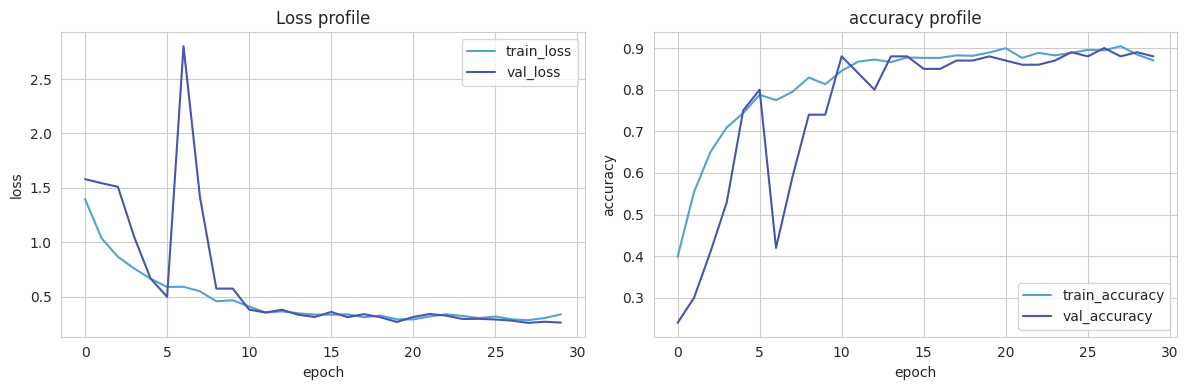

In [5]:
config = Config()
config.data_dir = '../data'
config.models_dir = '../models'
config.model_name = 'conv_lstm-exp4'
config.colab_clips_dir = '/content/Project_data'
config.aug_size = 0.5
config.clip_dim = (20, 3, 160, 160)
config.train_batch_size = 10
config.valid_batch_size = 64
config.num_epochs = 30
config.frame_idx = list(range(6, 26))

config.save_checkpoint = True

model = convlstm(conv_config =[(8, 3, 0), (16, 3, 0)],
                 conv_lstm_config = [(8, 3, 0)],
                 dense_config=[(64, 0.25)],
                 clip_dim = config.clip_dim)
print(model.summary())
print("Total Params:", f'{round(model.count_params()/1e6,2)}M'); print('-'*120)
history, meta_data = Trainer(config = config).start(model = model)
plot_performance(path = config.dest_path)

## Experiment 5

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_7 (TimeDi  (None, 5, 158, 158, 8)    224       
 stributed)                                                      
                                                                 
 batch_normalization_9 (Bat  (None, 5, 158, 158, 8)    32        
 chNormalization)                                                
                                                                 
 time_distributed_8 (TimeDi  (None, 5, 156, 156, 16)   1168      
 stributed)                                                      
                                                                 
 batch_normalization_10 (Ba  (None, 5, 156, 156, 16)   64        
 tchNormalization)                                               
                                                                 
 conv_lstm2d_2 (ConvLSTM2D)  (None, 154, 154, 16)     

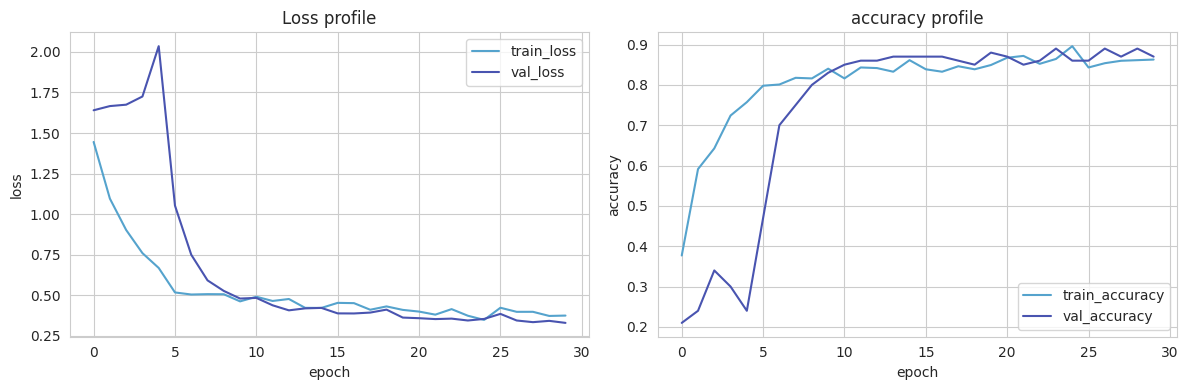

In [7]:
config = Config()
config.data_dir = '../data'
config.models_dir = '../models'
config.model_name = 'conv_lstm-exp5'
config.colab_clips_dir = '/content/Project_data'
config.aug_size = 0
config.clip_dim = (20, 3, 160, 160)
config.train_batch_size = 10
config.valid_batch_size = 64
config.num_epochs = 30
config.frame_idx = list(range(6, 26))

config.save_checkpoint = True

model = convlstm(conv_config =[(8, 3, 0), (16, 3, 0)],
                 conv_lstm_config = [(16, 3, 0)],
                 dense_config=[(64, 0.25)],
                 clip_dim = config.clip_dim)
print(model.summary())
print("Total Params:", f'{round(model.count_params()/1e6,2)}M'); print('-'*120)
history, meta_data = Trainer(config = config).start(model = model)
plot_performance(path = config.dest_path)